## Abstract

## Generating Training Data

First, we import the packages we will need for this assignment.

In [1]:
# import packages
%load_ext autoreload
%autoreload 2
from sparse_kernel_logistic import KernelLogisticRegression, GradientDescentOptimizer
import torch 
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

Next, we generate the data that we will use to train our model.
Thank you to Professor Chodrow for providing the functions for generating and visualizing training data.

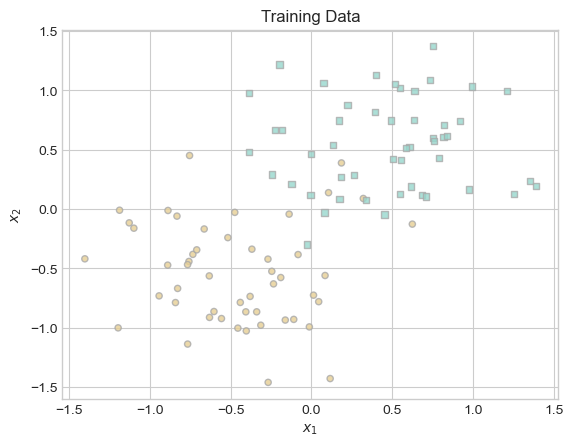

In [2]:
# define function for creating classification data
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    # X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    X = X - X.mean(dim = 0, keepdim = True)
    return X, y

# define function for plotting classification data
def plot_classification_data(X, y, ax):
    assert X.shape[1] == 2, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -1, vmax = 2, alpha = 0.8, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

# create classification data
X, y = classification_data(n_points = 100, noise = 0.4)

# plot classification data
fig, ax = plt.subplots(1, 1)
plot_classification_data(X, y, ax)
plt.title("Training Data");

## asdf



In [32]:
# define kernel
def rbf_kernel(X_1, X_2, gamma):
    return torch.exp(-gamma*torch.cdist(X_1, X_2)**2)

# create kernel logistic regression model
KR = KernelLogisticRegression(X, rbf_kernel, lam = 0.1, gamma = 0.1)
opt = GradientDescentOptimizer(KR)

# fit model
for i in range(100000):
    # update model
    opt.step(X, y, alpha = 0.0001)

In [33]:
(1.0*(KR.a > 0.001)).mean()

tensor(0.)

In [34]:
KR.a.max()

tensor(9.3635e-06)

In [35]:
KR.loss(X, y)

tensor(-0.6931)

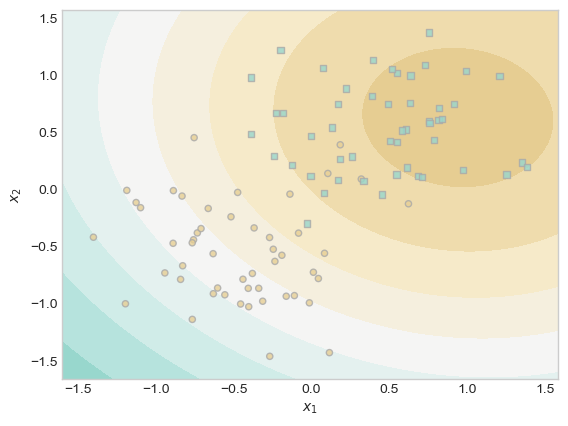

In [36]:
ix = torch.abs(KR.a) > 0.001

x1 = torch.linspace(X[:,0].min() - 0.2, X[:,0].max() + 0.2, 101)
x2 = torch.linspace(X[:,1].min() - 0.2, X[:,1].max() + 0.2, 101)

X1, X2 = torch.meshgrid(x1, x2, indexing='ij')

x1 = X1.ravel()
x2 = X2.ravel()

X_ = torch.stack((x1, x2), dim = 1)

preds = KR.score(X_)#, recompute_kernel = True)
preds = 1.0*torch.reshape(preds, X1.size())

fig, ax = plt.subplots(1, 1)
ax.contourf(X1, X2, preds, origin = "lower", cmap = "BrBG", 
vmin = 2*preds.min() - preds.max(), vmax = 2*preds.max() - preds.min()
)
plot_classification_data(X, y, ax)
plt.scatter(X[ix, 0],X[ix, 1], facecolors = "none", edgecolors = "black");
# ax.scatter(X[ix, 0],X[ix, 1], facecolors = "none", edgecolors = "black")

## Conclusion


# Questions: 
- What is $X_t$ / how is it different from $X$?
    - t is the training one
    - only different when doing it on the test set
- Why do I have to save $X_t$ as an instance variable?
    - bc use X on test
- How does one do gradient descent with a?
    - Compute gradient of the loss function. 
    - First term not too bad. Second term look at lecture notes
    - Similar to w
    - Can do torch auto grad if I prefer
- What does recompute kernel = True mean?
- Order of ops in score: T or K first?
- How are predictions made in this case?